In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading Data


In [2]:
df_hmeq = pd.read_csv('../input/hmeq-data/hmeq.csv')

In [3]:
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df_hmeq.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

Bad<br>
1 = client defaulted on loan 0 = loan repaid<br><br>
LOAN<br>Amount of the loan request<br><br>MORTDUE<br>Amount due on existing mortgage<br><br>VALUE<br>Value of current property<br><br>REASON<br>DebtCon = debt consolidation HomeImp = home improvement<br><br>JOB<br>Six occupational categories<br><br>YOJ<br>Years at present job<br><br>DEROG<br>Number of major derogatory reports<br><br>DELINQ<br>Number of delinquent credit lines<br><br>CLAGE<br>Age of oldest trade line in months<br><br>
NINQ<br>
Number of recent credit lines<br>

CLNO<br>
Number of credit lines<br>

DEBTINC<br>
Debt-to-income ratio<br>

In [5]:
df_hmeq.isnull().sum()/df_hmeq.shape[0] *100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [6]:
df_hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### Handling Missing Values

In [7]:
#Mortdue
df_hmeq[df_hmeq['MORTDUE'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN
24,1,2400,NaN,17180.0,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
40,1,3000,NaN,8800.0,HomeImp,Other,2.0,0.0,1.0,77.766667,0.0,3.0,NaN
41,1,3000,NaN,33000.0,HomeImp,Other,1.0,0.0,1.0,23.300000,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,53700,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940
5883,0,53800,NaN,81322.0,HomeImp,Self,9.0,0.0,0.0,171.447555,0.0,22.0,24.709060
5884,0,53900,NaN,91309.0,HomeImp,Other,NaN,0.0,0.0,349.795748,0.0,6.0,22.061330
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN


In [8]:
df_hmeq['MORTDUE'].value_counts()

42000.0     11
47000.0     10
65000.0      9
50000.0      7
124000.0     7
            ..
65372.0      1
15346.0      1
58549.0      1
69195.0      1
48811.0      1
Name: MORTDUE, Length: 5053, dtype: int64

- For the MortDue column missing values could be due to the fact that the person does have a mortgage.
- For this column missing values can be replaced with 0 as it would not affect the data as such.As person not having a mortgage or is it is not know if a person is having a mortgage or not can be represented by 0.

In [9]:
df_hmeq['MORTDUE'].fillna(0,inplace=True)

In [10]:
#Value Missing Values
df_hmeq[df_hmeq['VALUE'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400,18000.0,NaN,HomeImp,Mgr,22.0,NaN,2.0,121.733333,0.0,10.0,NaN
57,1,3200,23159.0,NaN,HomeImp,Mgr,20.0,NaN,2.0,117.805748,0.0,9.0,0.524499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,1,50000,26976.0,NaN,DebtCon,Mgr,8.3,1.0,0.0,111.600000,1.0,6.0,NaN
5818,1,50000,106000.0,NaN,DebtCon,Mgr,0.8,0.0,2.0,252.633333,3.0,32.0,NaN
5822,1,50000,30338.0,NaN,DebtCon,Mgr,8.0,0.0,0.0,91.431005,0.0,5.0,35.084001
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


In [11]:
df_hmeq['VALUE'].value_counts()

60000.0     15
80000.0     14
85000.0     12
65000.0     11
78000.0     10
            ..
116994.0     1
42682.0      1
72175.0      1
70095.0      1
88934.0      1
Name: VALUE, Length: 5381, dtype: int64

In [12]:
df_hmeq['VALUE'].mean()

101776.04874145007

In [13]:
df_hmeq['VALUE'].fillna(df_hmeq['VALUE'].mean(),inplace=True)

In [14]:
#Reason Missing Values
df_hmeq[df_hmeq['REASON'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,0.0,101776.048741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000,22608.0,101776.048741,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,2000,64536.0,87400.000000,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN
17,1,2200,23030.0,101776.048741,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3.711312
51,0,3100,0.0,70400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,1,32000,92400.0,215000.000000,NaN,Self,2.5,1.0,3.0,165.333333,1.0,40.0,NaN
5468,1,32900,0.0,55657.000000,NaN,NaN,1.0,1.0,3.0,210.012265,10.0,15.0,1.909225
5803,1,49500,247500.0,101776.048741,NaN,Other,0.0,0.0,4.0,160.333333,2.0,25.0,NaN
5826,1,50100,256431.0,101776.048741,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0,3.342570


In [15]:
df_hmeq['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

- For Reason column there are 2 available options DebCon,HomeImp.For columns where don't the reason for taking loan it is better to classify them as a seperate category as 'Other Reason'.

In [16]:
df_hmeq['REASON'].fillna('OtherReason',inplace=True)

In [17]:
#Job missing values
df_hmeq['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [18]:
#Replacing missing values of Job column with it's mode.
df_hmeq['JOB'].fillna(df_hmeq['JOB'].mode()[0],inplace=True)

In [19]:
df_hmeq[df_hmeq['YOJ'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,0.0,101776.048741,OtherReason,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1,2200,24280.0,34687.000000,HomeImp,Other,NaN,0.0,1.0,300.866667,0.0,8.0,NaN
24,1,2400,0.0,17180.000000,HomeImp,Other,NaN,0.0,0.0,14.566667,3.0,4.0,NaN
29,0,2500,7229.0,44516.000000,HomeImp,Self,NaN,0.0,0.0,208.000000,0.0,12.0,NaN
51,0,3100,0.0,70400.000000,OtherReason,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0,51500,0.0,90003.000000,HomeImp,Other,NaN,0.0,0.0,347.802514,0.0,7.0,25.324002
5862,0,52200,0.0,90240.000000,HomeImp,Other,NaN,0.0,0.0,341.828812,0.0,7.0,24.016671
5865,0,52300,0.0,84584.000000,HomeImp,Other,NaN,1.0,0.0,350.920996,0.0,7.0,24.355304
5880,0,53700,0.0,84205.000000,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.639940


In [20]:
#Replacing null values for YOJ with it's mean
df_hmeq['YOJ'].fillna(df_hmeq['YOJ'].mean(),inplace=True)

In [21]:
#DEROG missing values
df_hmeq[df_hmeq['DEROG'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,0.0,101776.048741,OtherReason,Other,8.922268,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000,22608.0,101776.048741,OtherReason,Other,18.000000,NaN,NaN,NaN,NaN,NaN,NaN
17,1,2200,23030.0,101776.048741,OtherReason,Other,19.000000,NaN,NaN,NaN,NaN,NaN,3.711312
23,1,2400,18000.0,101776.048741,HomeImp,Mgr,22.000000,NaN,2.0,121.733333,0.0,10.0,NaN
48,0,3000,58000.0,71500.000000,HomeImp,Mgr,10.000000,NaN,2.0,211.933333,0.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,0,42900,101731.0,155688.000000,DebtCon,Other,14.000000,NaN,1.0,235.352057,3.0,30.0,43.181424
5763,0,44400,100564.0,154708.000000,DebtCon,Other,14.000000,NaN,0.0,253.914111,3.0,30.0,43.902152
5766,0,44900,95410.0,157649.000000,DebtCon,Other,16.000000,NaN,1.0,216.101046,4.0,31.0,40.483515
5820,1,50000,80286.0,145000.000000,DebtCon,Other,12.000000,NaN,1.0,178.766599,0.0,35.0,NaN


In [22]:
df_hmeq['DEROG'].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

- For Derog column the missing values can be replaced with 0 as Nan and 0 for count of Derog reports will signify the same thing.

In [23]:
df_hmeq['DEROG'].fillna(0,inplace=True)

In [24]:
#DELINQ missing values
df_hmeq['DELINQ'].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

For DELINQ column the missing values can be replaced with 0 as Nan and 0 for count of Derog reports will signify the same thing.

In [25]:
df_hmeq['DELINQ'].fillna(0,inplace=True)

In [26]:
#CLAGE missing values
df_hmeq['CLAGE'].value_counts()

102.500000    7
206.966667    7
177.500000    6
123.766667    6
95.366667     6
             ..
240.856017    1
196.241371    1
71.461705     1
184.880011    1
219.601002    1
Name: CLAGE, Length: 5314, dtype: int64

In [27]:
df_hmeq['CLAGE'].describe()

count    5652.000000
mean      179.766275
std        85.810092
min         0.000000
25%       115.116702
50%       173.466667
75%       231.562278
max      1168.233561
Name: CLAGE, dtype: float64

In [28]:
df_hmeq[df_hmeq['CLAGE'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,0.0,101776.048741,OtherReason,Other,8.922268,0.0,0.0,NaN,NaN,NaN,NaN
10,1,2000,22608.0,101776.048741,OtherReason,Other,18.000000,0.0,0.0,NaN,NaN,NaN,NaN
17,1,2200,23030.0,101776.048741,OtherReason,Other,19.000000,0.0,0.0,NaN,NaN,NaN,3.711312
21,1,2400,50000.0,73395.000000,HomeImp,ProfExe,5.000000,1.0,0.0,NaN,1.0,0.0,NaN
51,0,3100,0.0,70400.000000,OtherReason,Other,8.922268,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,0,37800,31214.0,58282.000000,DebtCon,Other,8.922268,0.0,0.0,NaN,7.0,0.0,34.226190
5635,0,38900,31836.0,54976.000000,DebtCon,Other,8.922268,0.0,0.0,NaN,6.0,0.0,33.459246
5637,0,39000,36335.0,50704.000000,DebtCon,Other,8.922268,0.0,0.0,NaN,7.0,0.0,31.244399
5784,1,47000,159500.0,230000.000000,DebtCon,Office,3.000000,0.0,0.0,NaN,0.0,0.0,NaN


- A trade line is an important record-keeping mechanism that tracks the activity of borrowers on their credit reports.
- CLAGE is Age of oldest trade line in months
- It means the oldest transaction that the borrower made where he was given some credit.
- If it is missing it might be as many of the credit lines are till 7-10 years so for some case it may be quite old.
- It makes no sense if we impute with mean/mode as it will be unwise to impute someone's past credit line with mean.
- It is better to replace the missing values with 0 for CLAGE so as to avoid any impact on the data.

In [29]:
df_hmeq['CLAGE'].fillna(0,inplace=True)

In [30]:
# NINQ missing values
df_hmeq['NINQ'].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: NINQ, dtype: int64

- A missing value for NINQ can be imputed with 0.Imputing with 0 is a safe option as it would not impact the data as such.

In [31]:
df_hmeq['NINQ'].fillna(0,inplace=True)

In [32]:
#CLNO missing values
df_hmeq['CLNO'].value_counts()

16.0    316
19.0    307
24.0    264
23.0    259
21.0    235
       ... 
58.0      3
71.0      2
53.0      2
57.0      1
63.0      1
Name: CLNO, Length: 62, dtype: int64

In [33]:
df_hmeq['CLNO'].describe()

count    5738.000000
mean       21.296096
std        10.138933
min         0.000000
25%        15.000000
50%        20.000000
75%        26.000000
max        71.000000
Name: CLNO, dtype: float64

- A missing value for CLNO can be imputed with 0.Imputing with 0 is a safe option as it would not impact the data as such.

In [34]:
df_hmeq['CLNO'].fillna(0,inplace=True)

In [35]:
#CLNO missing values
df_hmeq['DEBTINC'].value_counts()

37.113614    1
44.382578    1
31.614680    1
41.576701    1
41.395462    1
            ..
31.613930    1
39.244669    1
40.943866    1
30.444839    1
34.571519    1
Name: DEBTINC, Length: 4693, dtype: int64

In [36]:
df_hmeq['DEBTINC'].describe()

count    4693.000000
mean       33.779915
std         8.601746
min         0.524499
25%        29.140031
50%        34.818262
75%        39.003141
max       203.312149
Name: DEBTINC, dtype: float64

In [37]:
df_hmeq[df_hmeq['DEBTINC'].isna()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,0.0,101776.048741,OtherReason,Other,8.922268,0.0,0.0,0.000000,0.0,0.0,NaN
4,0,1700,97800.0,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,1,72300,0.0,85000.000000,DebtCon,Other,1.000000,0.0,0.0,117.166667,9.0,23.0,NaN
5932,1,76500,38206.0,90000.000000,DebtCon,Other,12.000000,0.0,0.0,134.900000,0.0,26.0,NaN
5933,1,77200,83962.0,215000.000000,HomeImp,Self,8.000000,1.0,2.0,71.533132,3.0,14.0,NaN
5935,0,78400,13900.0,102910.000000,HomeImp,Other,27.000000,0.0,1.0,138.000000,0.0,14.0,NaN


In [38]:
df_hmeq['DEBTINC'].isnull().sum()/df_hmeq.shape[0]*100

21.258389261744966

- We cannot impute DEBTINC missing values with 0 as 0 would signify debt is 0 but is not the case on looking from above data.
- 21% of values are missing which is very high percentage so the option to drop them is also not advisiable.
- Mean would be the ideal imputation


In [39]:
df_hmeq['DEBTINC'].fillna(df_hmeq['DEBTINC'].mean(),inplace=True)

In [40]:
df_hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

- All missing values have been handled

##### 

In [41]:
df_hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### Data Transformation

#### Label Encoding the categorical variables so as to use in the ML model

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [43]:
df_categorical = df_hmeq.select_dtypes(include=['object'])

In [44]:
df_categorical.head()

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,OtherReason,Other
4,HomeImp,Office


In [45]:
df_categorical['JOB'].value_counts()

Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [46]:
df_categorical['REASON'].value_counts()

DebtCon        3928
HomeImp        1780
OtherReason     252
Name: REASON, dtype: int64

In [47]:
df_categorical = df_categorical.apply(le.fit_transform)

In [48]:
print(le.transform(le.classes_))

[0 1 2 3 4 5]


In [49]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Mgr': 0, 'Office': 1, 'Other': 2, 'ProfExe': 3, 'Sales': 4, 'Self': 5}

In [50]:
list(df_categorical.columns)

['REASON', 'JOB']

In [51]:
df_hmeq.drop(list(df_categorical.columns),axis=1,inplace=True)

In [52]:
df_hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [53]:
df_hmeq = pd.concat([df_categorical,df_hmeq],axis=1)

In [54]:
df_hmeq.shape

(5960, 13)

### Basic EDA

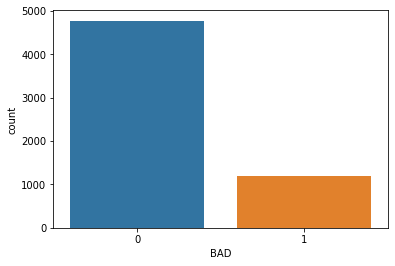

In [55]:
sns.countplot(x='BAD',data=df_hmeq)
plt.show()

- Imbalance data set as people who repaid have higer precentage as compare to people who were unable to pay the loan.


### EDA is remaining

In [56]:
#BaseLine Accuracy
X = df_hmeq.drop('BAD',axis=1)
y = df_hmeq['BAD']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=100)
#Stratify will help in having the same proportion of y as in original data set for train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4172, 12)
(4172,)
(1788, 12)
(1788,)


In [58]:
from sklearn.dummy import DummyClassifier

In [59]:
dummy_clf = DummyClassifier(strategy ='most_frequent')
dummy_clf.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [60]:
baseline_accurracy = dummy_clf.score(X_test,y_test)
print(baseline_accurracy)

0.8003355704697986


### Ensemble Learning

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [62]:
bagging_model = BaggingClassifier(random_state =100)
bagging_model.fit(X_train,y_train)
bagging_y_pred = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test ,bagging_y_pred )
print(f'Accuracy:{bagging_acc}')

Accuracy:0.8937360178970917


In [63]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, bagging_y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1431
           1       0.80      0.63      0.70       357

    accuracy                           0.89      1788
   macro avg       0.85      0.79      0.82      1788
weighted avg       0.89      0.89      0.89      1788



- Try sub-sampling the dataset as it is an imbalanced dataset.

In [64]:
recall_score(y_test, bagging_y_pred)

0.6302521008403361

In [65]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

print_recall_scores(bagging_model, X_test, y_test)

Recall for Base Model 1:	 0.61905
----------------------------------------
Recall for Base Model 2:	 0.64426
----------------------------------------
Recall for Base Model 3:	 0.60504
----------------------------------------
Recall for Base Model 4:	 0.61625
----------------------------------------
Recall for Base Model 5:	 0.61625
----------------------------------------
Recall for Base Model 6:	 0.64706
----------------------------------------
Recall for Base Model 7:	 0.61345
----------------------------------------
Recall for Base Model 8:	 0.64706
----------------------------------------
Recall for Base Model 9:	 0.62185
----------------------------------------
Recall for Base Model 10:	 0.61064
Mean Recall Score:		 0.62409
Std Deviation:			 0.01507
Range:				 0.04202
Overall Recall for model:	 0.63025


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has featu

### Random Forests

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(n_estimators = 10,max_features = 7,random_state = 100)

In [68]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=10, random_state=100)

In [69]:
rf_y_test_pred = rf_model.predict(X_test)

In [70]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report for Random Forest:\n')
print(classification_report(y_test, rf_y_test_pred))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.80      0.64      0.71       357

    accuracy                           0.90      1788
   macro avg       0.86      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



In [71]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        print(model)
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

print_recall_scores(rf_model, X_test, y_test)

DecisionTreeClassifier(max_features=7, random_state=186422792)
Recall for Base Model 1:	 0.57703
----------------------------------------
DecisionTreeClassifier(max_features=7, random_state=735107864)
Recall for Base Model 2:	 0.61625
----------------------------------------
DecisionTreeClassifier(max_features=7, random_state=1195587395)
Recall for Base Model 3:	 0.64706
----------------------------------------
DecisionTreeClassifier(max_features=7, random_state=1769725799)
Recall for Base Model 4:	 0.64986
----------------------------------------
DecisionTreeClassifier(max_features=7, random_state=1823289175)
Recall for Base Model 5:	 0.59664
----------------------------------------
DecisionTreeClassifier(max_features=7, random_state=113311823)
Recall for Base Model 6:	 0.66106
----------------------------------------
DecisionTreeClassifier(max_features=7, random_state=1480802224)
Recall for Base Model 7:	 0.64706
----------------------------------------
DecisionTreeClassifier(max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has featu

In [72]:
rf_model_oob = RandomForestClassifier(n_estimators = 100,max_features = 7,oob_score=True,random_state = 50)
rf_model_oob.fit(X_train,y_train)

RandomForestClassifier(max_features=7, oob_score=True, random_state=50)

In [73]:
oob_score = round(rf_model_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test,rf_model_oob.predict(X_test)))
diff_oob = round(abs(oob_score-acc_oob),4)

print(f'OOB Score:{oob_score}')
print(f'Testing Accuracy:{acc_oob}')
print(f'Acc.Difference:{diff_oob}')

OOB Score:0.9051
Testing Accuracy:1
Acc.Difference:0.0949


- OOB score is comparable to the Accuracy score.

### Feature Importance

In [74]:
feature_importance = rf_model_oob.feature_importances_
feature_names  = X_train.columns
df = pd.DataFrame({'Features':feature_names,
                  'Importance':feature_importance})


In [75]:
df.sort_values('Importance',ascending=False)

,Features,Importance
11,DEBTINC,0.302608
7,DELINQ,0.105870
8,CLAGE,0.102763
4,VALUE,0.080931
2,LOAN,0.077297
3,MORTDUE,0.069615
10,CLNO,0.067462
5,YOJ,0.065175
6,DEROG,0.049055
9,NINQ,0.034971


### Boosting Model

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train,y_train)
gbt_model_y_pred = gbt_model.predict(X_test)


In [78]:
print('Classification Report for Boosting:\n')
print(classification_report(y_test, gbt_model_y_pred))

Classification Report for Boosting:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1431
           1       0.84      0.67      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



In [79]:
feature_importance = gbt_model.feature_importances_
feature_names  = X_train.columns
df = pd.DataFrame({'Features':feature_names,
                  'Importance':feature_importance})

df.sort_values('Importance',ascending=False)

,Features,Importance
11,DEBTINC,0.511270
7,DELINQ,0.152369
8,CLAGE,0.072747
6,DEROG,0.072719
4,VALUE,0.050665
10,CLNO,0.033433
2,LOAN,0.030473
3,MORTDUE,0.026474
5,YOJ,0.019626
9,NINQ,0.018083
